# ***Capstone 2 - New York City TLC***

The Capstone project involved developing data analytics, when students in the Data Science and Machine Learning program at Purwadhika, took on the role of data analysts at a company. I have provided the opportunity to formulate a series of questions based on the business needs and challenges that the company in question may face, using the dataset provided.

**Presented by : Farid Hakimil (JCDS 2302)**

# **Business Problem Statement**

As one of the most populous cities in the United States, New York City witnesses thousands of taxi trips every day. The analysis aims to conduct a quantitative analysis of the New York City Taxi and Limousine Commission (TLC) trip record data to gain a better understanding of it. A company would like to know a possibility to 

Based on the problems, we will try to provide recommendations that might improve taxi drivers’ or company income:

1. How the way to increase utilization of taxi? 

2. How to boosting drivers income?


# **Objective of Analysis**

To answer the business questions above, we will try to find an approach :

1. The best location (high demand and high revenue)

2. The best time to decide how many unit taxi has to operated

3. To know about tip behaviour

# **Data Preparation**

### **Import library**

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## **1. Load Dataset**

In [171]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00


### **1.1. Additional Data --> LocationID**

**Catatan :**

- Informasi dan data tambahan terkait NYC TLC dapat ditelusuri dari tautan berikut :

    https://www.nyc.gov/site/tlc/about/about-tlc.page

- Terkait dengan keterangan atas kode (Pick Up dan Drop Off ID) diperlukan tambahan data, yang didapat dari tautan berikut :

    https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv

In [172]:
df_loc = pd.read_csv('taxi_zone_lookup.csv').rename(columns={'LocationID' : 'PULocationID'})
df_loc

,PULocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


### **1.2. Merge Data**

In [173]:
df = pd.merge(left= df, right= df_loc, how= 'left',  on= 'PULocationID').rename(columns={'Borough':'pu_borough','Zone':'pu_zone'}).drop(columns='service_zone', axis = 1)

df = df.join(df_loc, lsuffix= '_1', rsuffix= '_2', how= 'left', on= 'DOLocationID').rename(columns={'Borough':'do_borough','Zone':'do_zone'}).drop(columns=['PULocationID_2','service_zone'], axis = 1)
df.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID_1,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Staten Island,Charleston/Tottenville
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Ozone Park


## <hr>

## **2. EDA (Exploratory Data Analysis)**

In [174]:
print(f'row and columns : {df.shape}')

pd.DataFrame({
    'data_name'     : df.columns.values,
    'data_type'     : df.dtypes.values,
    'data_missing'  : df.isna().sum().values,
    'n_unique'      : df.nunique().values,
    'sample_unique' : [df[x].unique() for x in df.columns]})

row and columns : (68211, 24)


,data_name,data_type,data_missing,n_unique,sample_unique
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,4324,2,"[N, Y, nan]"
4,RatecodeID,float64,4324,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID_1,int64,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,4324,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


### **2.1. Data Details**

#### **2.1.1 VendorID**

a code indicating the provider associated with the trip record

- 1. Creative Mobile Technologies, LLC

- 2. **VeriFone Inc** (majority)

In [175]:
df['VendorID'].value_counts()

VendorID
2    58868
1     9343
Name: count, dtype: int64

#### **2.1.2 lpep_pickup_datetime**

- The date and time when the meter was engaged

- The data for analysis is data for **January 2023**

#### **2.1.3 lpep_dropoff_datetime**

- The date and time when the meter was disengaged

#### **2.1.4 store_and_fwd_flag**

- This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, 

- aka “store and forward,” because the vehicle did not have a connection to the server.

- Y = store and forward trip

- N = not a store and forward trip

In [176]:
df['store_and_fwd_flag'].isna().sum()

4324

In [177]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    63579
Y      308
Name: count, dtype: int64

#### **2.1.5 RatecodeID**

The final rate code is in effect at the end of the trip.

1 = Standard rate

2 = JFK

3 = Newark

4 = Nassau or Westchester

5 = Negotiated fare

6 = Group ride

In [178]:
df['RatecodeID'].isna().sum()

4324

In [179]:
df['RatecodeID'].value_counts().sort_index()

RatecodeID
1.0     62103
2.0       158
3.0        30
4.0        57
5.0      1529
99.0       10
Name: count, dtype: int64

**Note** : There is anomali for ratecodeID : 99

#### **2.1.6 PULocationID**

TLC Taxi Zone in which the taximeter was engaged

In [180]:
df['PULocationID_1'].nunique()

226

#### **2.1.7 DOLocationID**

TLC Taxi Zone in which the taximeter was disengaged

In [181]:
df['DOLocationID'].nunique()

249

#### **2.1.8 passenger_count**

- The number of passengers in the vehicle.

- This is a driver-entered value.

In [182]:
df['passenger_count'].value_counts().sort_index()

passenger_count
0.0      336
1.0    54299
2.0     5096
3.0      958
4.0      364
5.0     1772
6.0     1054
7.0        4
8.0        2
9.0        2
Name: count, dtype: int64

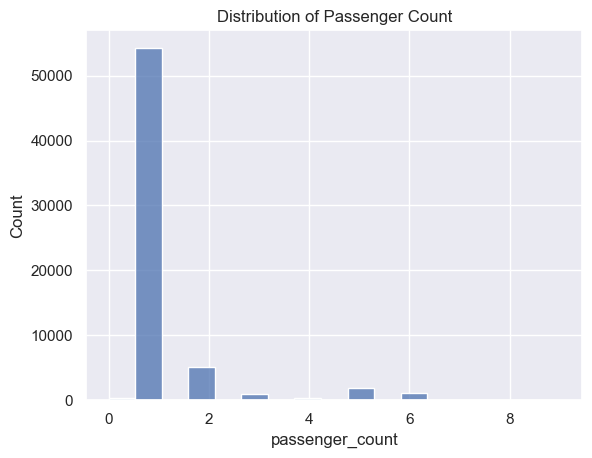

In [183]:
sns.histplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

#### **2.1.9 trip_distance**

The elapsed trip distance in miles was reported by the taximeter

In [184]:
df['trip_distance'].describe()

count     68211.000000
mean          8.114852
std         585.105955
min           0.000000
25%           1.110000
50%           1.850000
75%           3.210000
max      120098.840000
Name: trip_distance, dtype: float64

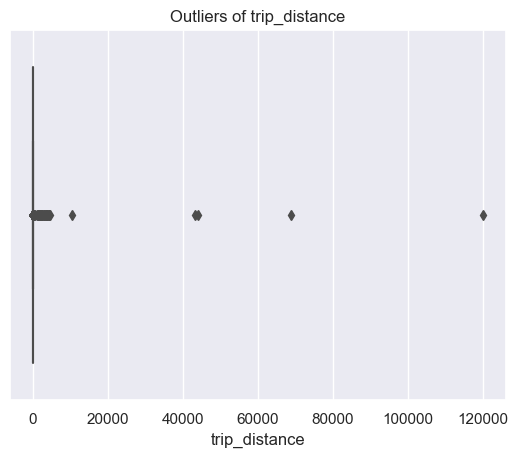

In [185]:
sns.boxplot(df, x='trip_distance')
plt.title('Outliers of trip_distance')
plt.show()

#### **2.1.10 fare_amount**

- The time-and-distance fare is calculated by the meter. 

- Extra Miscellaneous extras and surcharges.

- Currently, this only includes the $0.50 and $1 rush hour and overnight charges

In [186]:
df['fare_amount'].describe()

count    68211.000000
mean        16.603545
std         13.470121
min        -70.000000
25%          9.300000
50%         13.500000
75%         19.800000
max        490.000000
Name: fare_amount, dtype: float64

#### **2.1.11 extra**

The TLC created the Taxi Improvement Fund (TIF) to support drivers of accessible medallion taxicabs, to ensure that all customers have equitable access to taxi transportation services

In [187]:
df['extra'].value_counts()

extra
 0.00     40724
 2.50     12117
 1.00     11136
 2.75      1574
 5.00       828
 0.50       615
 5.25       496
 7.50       287
 3.75       220
 6.00        80
 3.25        52
-2.50        47
-1.00        31
-0.50         2
 5.50         1
 12.50        1
Name: count, dtype: int64

#### **2.1.12 mta_tax**

$0.50 MTA tax that is automatically triggered based on the metered rate in use

In [188]:
df['mta_tax'].value_counts()

mta_tax
 0.50    53177
 1.50     9065
 0.00     5778
-0.50      165
 1.00       25
 2.75        1
Name: count, dtype: int64

#### **2.1.13 tip_amount**

- This field is automatically populated for credit card tips. 

- **Cash tips are not included**

- A numeric code signifying how the passenger paid for the trip :

    1 = Credit card

    2 = Cash

    3 = No charge

    4 = Dispute

    5 = Unknown

    6 = Voided trip

In [189]:
df.groupby(by='payment_type')['tip_amount'].count()

payment_type
1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: tip_amount, dtype: int64

In [190]:
df[df['payment_type'] != 1]['tip_amount'].nunique()

997

#### **2.1.14 tolls_amount**

The total amount of all tolls paid in the trip

In [191]:
df['tolls_amount'].describe()

count    68211.000000
mean         0.169627
std          1.099789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         36.050000
Name: tolls_amount, dtype: float64

#### **2.1.15 ehail_fee**

#### **2.1.16 improvement_surcharge**

- $0.30 improvement surcharge assessed on hailed trips at the flag drop.

- The improvement surcharge began being levied in 2015

In [192]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
 1.0    63892
 0.3     3959
 0.0      186
-1.0      166
-0.3        8
Name: count, dtype: int64

#### **2.1.17 total_amount**

- The total amount charged to passengers. 

- Does not include cash tips

In [193]:
df['total_amount'].describe()

count    68211.000000
mean        21.789377
std         15.457115
min        -71.500000
25%         12.900000
50%         17.900000
75%         26.150000
max        491.000000
Name: total_amount, dtype: float64

#### **2.1.18 payment_type**

- A numeric code signifying how the passenger paid for the trip :

    1 = Credit card

    2 = Cash

    3 = No charge

    4 = Dispute

    5 = Unknown

    6 = Voided trip

#### **2.1.19 trip_type**

A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based
on the metered rate in use but can be altered by the
driver.

1 = Street-hail

2 = Dispatch

In [194]:
df['trip_type'].value_counts()

trip_type
1.0    62476
2.0     1401
Name: count, dtype: int64

#### **2.1.20 congestion_surcharge**

### **2.2. Other Info**

- $3.00 initial charge.

- Plus 70 cents per 1/5 mile when traveling above 12mph or per 60 seconds in slow traffic or when the vehicle is stopped.

- Plus 50 cents MTA State Surcharge for all trips that end in New York City or Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties.

- Plus $1.00 Improvement Surcharge.

- Plus $1.00 overnight surcharge 8pm to 6am.

- Plus $2.50 rush hour surcharge from 4pm to 8pm on weekdays, excluding holidays.

- Plus New York State Congestion Surcharge of $2.50 (Yellow Taxi) or $2.75 (Green Taxi and FHV) or 75 cents (any shared ride) for all trips that begin, end or pass through Manhattan south of 96th Street.

- Plus tips and any tolls.

- There is no charge for extra passengers, luggage or bags, or paying by credit card.

- The on-screen rate message should read: "Rate #01 – Standard City Rate."

- Make sure to always take your receipt.

## <hr>

## **3. Data Prepocessing**

### **3.1 Drop Unnecessary Columns**

***vendorID***
- Kolom ***vendorID*** hanya menampilkan data provider data, hal ini tidak berkorelasi dalam analisa

***store_and_fwd_flag***

- Kolom ***store_and_fwd_flag*** dimaksudkan untuk menandai rekaman suatu perjalanan sudah dicatatkan dalam memori kendaraan atau belum.
- Hal ini berlaku untuk argometer yang tidak terkoneksi dengan server
- Terdapat 4324 baris yang kosong
- Menurut saya kolom ***store_and_fwd_flag*** bukan termasuk dalam data yang diperlukan untuk analisa

***ehail_fee :***

- Kolom ***ehail_fee*** berdasarkan domain knowledge adalah biaya yang dikeluarkan atas panggilan taxi secara online 
- Value kolom ***ehail_fee*** semua adalah 0, shg kolom ehail_fee dimungkinkan untuk dihapuskan

In [195]:
df.drop(columns= ['VendorID','ehail_fee','store_and_fwd_flag'], axis= 1, inplace= True)
df.head(1)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID_1,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa


### **3.2 Change Columns Name**

In [196]:
df = df.rename(columns={
                        'lpep_pickup_datetime'  : 'pu_datetime', 
                        'lpep_dropoff_datetime' : 'do_datetime',
                        'RatecodeID'            : 'ratecode',
                        'PULocationID_1'        : 'pu_loc',
                        'DOLocationID'          : 'do_loc',
                        'improvement_surcharge' : 'improve_sur',
                        'congestion_surcharge'  : 'congest_sur',
                        'Borough'               : 'borough',
                        'Zone'                  : 'zone'
    })
df.head(1)

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa


### **3.3 Handling Missing Value**

In [197]:
df.isna().sum()

pu_datetime           0
do_datetime           0
ratecode           4324
pu_loc                0
do_loc                0
passenger_count    4324
trip_distance         0
fare_amount           0
extra                 0
mta_tax               0
tip_amount            0
tolls_amount          0
improve_sur           0
total_amount          0
payment_type       4324
trip_type          4334
congest_sur        4324
pu_borough           66
pu_zone             135
do_borough          668
do_zone            1815
dtype: int64

#### **3.3.1 ratecode**

In [198]:
df['ratecode'].isna().sum()

4324

In [199]:
df['ratecode'].value_counts().sort_index()

ratecode
1.0     62103
2.0       158
3.0        30
4.0        57
5.0      1529
99.0       10
Name: count, dtype: int64

In [200]:
df[df['ratecode'] == 99]

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone
1084,2023-01-01 19:44:13,2023-01-01 19:58:30,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Queens,Corona
2174,2023-01-02 16:39:05,2023-01-02 17:31:42,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0,Queens,East Flushing,Queens,Elmhurst/Maspeth
9055,2023-01-05 20:33:45,2023-01-05 22:46:41,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0,Brooklyn,Bay Ridge,Queens,Howard Beach
14125,2023-01-08 11:36:41,2023-01-08 12:14:59,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0,Brooklyn,Crown Heights North,Bronx,East Tremont
29143,2023-01-15 13:51:42,2023-01-15 14:37:38,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0,Brooklyn,Gravesend,Bronx,Parkchester
29711,2023-01-15 17:52:52,2023-01-15 22:11:55,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Queens,Howard Beach
35975,2023-01-19 01:07:59,2023-01-19 01:17:19,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Manhattan,Flatiron,Bronx,East Concourse/Concourse Village
37691,2023-01-19 17:16:59,2023-01-19 22:29:53,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0,NaN,Outside of NYC,Queens,Howard Beach
42432,2023-01-21 20:29:58,2023-01-22 02:59:25,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Queens,Howard Beach
45204,2023-01-23 13:45:11,2023-01-23 23:36:42,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0,Manhattan,Washington Heights South,Manhattan,West Village


**NOTE**

The assumption of changing the value 99 to 1 are :

- pu_borough        : Brooklyn, Queens, Manhattan, Outside of NYC

- passenger_count   : 1

- fare_amount       : high value

**Change the Value**

In [201]:
df['ratecode'].replace({99 : 1}, inplace= True)

**Fill in missing values**

In [202]:
# check with skew of ratecode
skew_rate = df['ratecode'].skew()

# check with kurtosis of ratecode
kurt_rate = df['ratecode'].kurtosis()

display(skew_rate, kurt_rate)

6.043694947593711

34.77581439300606

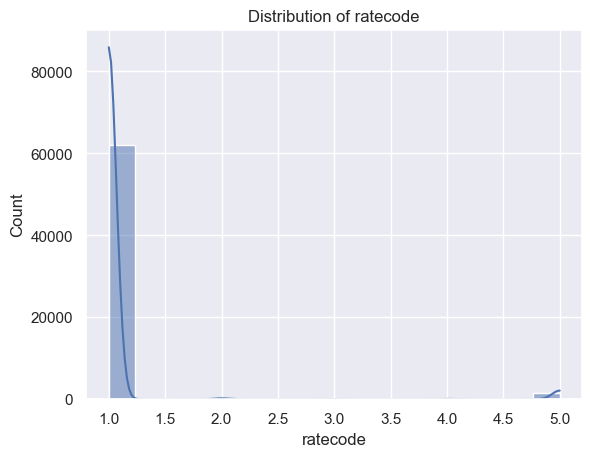

In [203]:
# check with histogram of ratecode
sns.histplot(data=df, x='ratecode', kde=True)

plt.title('Distribution of ratecode')
plt.show()

In [204]:
# Histogram data ratecode --> not normally distributed : Use median
df['ratecode'].fillna(df['ratecode'].median(), inplace=True)

#### **3.3.2 passenger_count**

In [205]:
df['passenger_count'].isna().sum()

4324

In [206]:
df['passenger_count'].value_counts().sort_index()

passenger_count
0.0      336
1.0    54299
2.0     5096
3.0      958
4.0      364
5.0     1772
6.0     1054
7.0        4
8.0        2
9.0        2
Name: count, dtype: int64

**NOTE :** 

The assumption of changing the value 0 to 1 is minimum passenger = 1

In [207]:
df['passenger_count'].replace({0 : 1}, inplace= True)

In [208]:
# check with skew of passenger_count
skew_rate = df['passenger_count'].skew()

# check with kurtosis of passenger_count
kurt_rate = df['passenger_count'].kurtosis()

display(skew_rate, kurt_rate)

3.5460384228837447

12.141483649007899

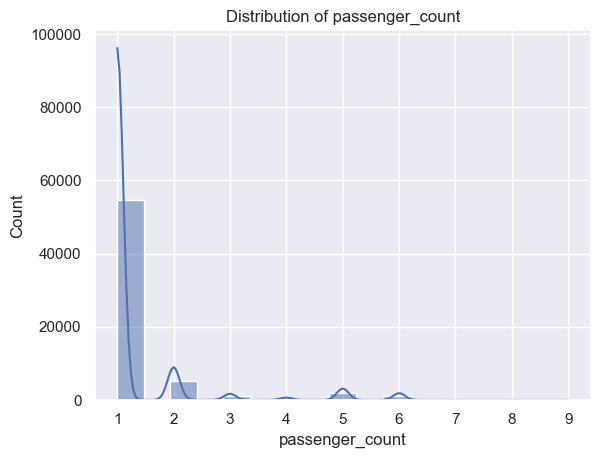

In [209]:
# check with histogram of passenger_count
sns.histplot(data=df, x='passenger_count', kde=True);

plt.title('Distribution of passenger_count')
plt.show()

In [210]:
# Histogram data passenger_count --> not normally distributed : Use median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

#### **3.3.3 payment_type**

In [211]:
df['payment_type'].value_counts()

payment_type
1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [212]:
# check with skew of payment_type
skew_rate = df['payment_type'].skew()

# check with kurtosis of payment_type
kurt_rate = df['payment_type'].kurtosis()

display(skew_rate, kurt_rate)

0.8699427454680758

-0.07561706275629154

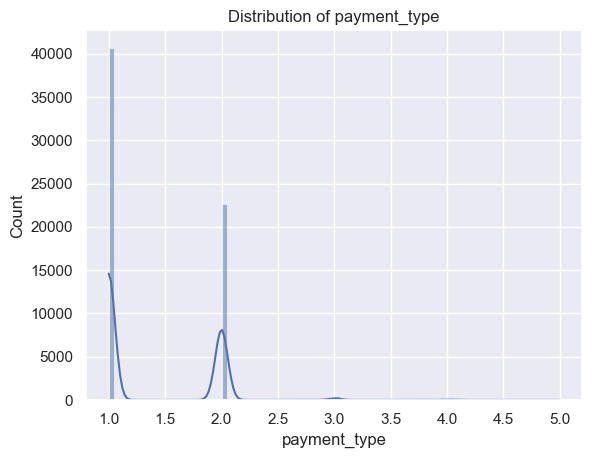

In [213]:
# check with histogram of payment_type
sns.histplot(data=df, x='payment_type', kde=True);

plt.title('Distribution of payment_type')
plt.show()

In [214]:
# Histogram data payment_type --> not normally distributed : Use median
df['payment_type'].fillna(df['payment_type'].median(), inplace=True)

In [215]:
df.isna().sum()

pu_datetime           0
do_datetime           0
ratecode              0
pu_loc                0
do_loc                0
passenger_count       0
trip_distance         0
fare_amount           0
extra                 0
mta_tax               0
tip_amount            0
tolls_amount          0
improve_sur           0
total_amount          0
payment_type          0
trip_type          4334
congest_sur        4324
pu_borough           66
pu_zone             135
do_borough          668
do_zone            1815
dtype: int64

#### **3.3.4 trip_type**

In [216]:
df['trip_type'].value_counts()

trip_type
1.0    62476
2.0     1401
Name: count, dtype: int64

In [217]:
# check with skew of trip_type
skew_rate = df['trip_type'].skew()

# check with kurtosis of trip_type
kurt_rate = df['trip_type'].kurtosis()

display(skew_rate, kurt_rate)

6.5282683544035525

40.61955951161304

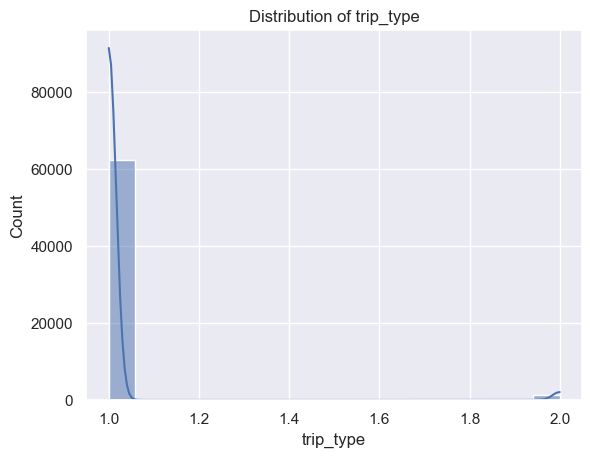

In [218]:
# check with histogram of trip_type
sns.histplot(data=df, x='trip_type', kde=True);

plt.title('Distribution of trip_type')
plt.show()

In [219]:
# Histogram data trip_type --> not normally distributed : Use median
df['trip_type'].fillna(df['trip_type'].median(), inplace=True)

#### **3.3.5 congest_sur**

In [220]:
df['congest_sur'].value_counts()

congest_sur
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [221]:
df[df['congest_sur'] == -2.75]

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone
33359,2023-01-17 18:57:59,2023-01-17 19:04:04,1.0,75,236,1.0,0.93,-7.9,-2.5,-0.5,0.0,0.0,-1.0,-14.65,3.0,1.0,-2.75,Manhattan,East Harlem South,Manhattan,Upper East Side South
36269,2023-01-19 08:25:38,2023-01-19 08:28:18,1.0,236,236,2.0,0.36,-4.4,0.0,-0.5,0.0,0.0,-1.0,-8.65,3.0,1.0,-2.75,Manhattan,Upper East Side North,Manhattan,Upper East Side South
36900,2023-01-19 13:49:39,2023-01-19 14:40:05,1.0,43,23,1.0,24.14,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.25,2.0,1.0,-2.75,Manhattan,Central Park,Manhattan,Bloomingdale


In [222]:
df['congest_sur'].replace({-2.75 : 2.75}, inplace= True)

In [223]:
# check with skew of congest_sur
skew_rate = df['congest_sur'].skew()

# check with kurtosis of congest_sur
kurt_rate = df['congest_sur'].kurtosis()

display(skew_rate, kurt_rate)

1.06857377392289

-0.8581317510560154

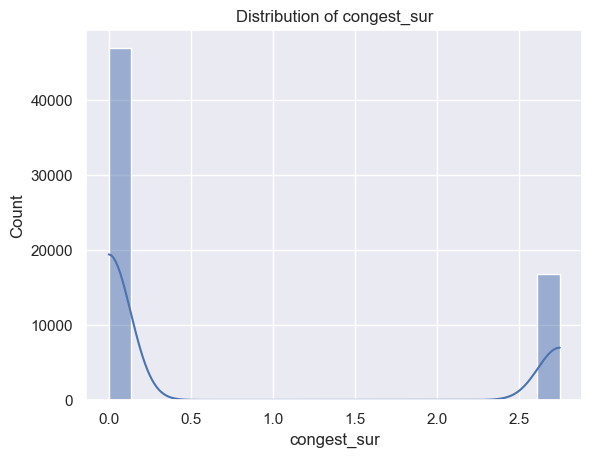

In [224]:
# check with histogram of congest_sur
sns.histplot(data=df, x='congest_sur', kde=True);

plt.title('Distribution of congest_sur')
plt.show()

### **3.4 Change the Data Type**

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pu_datetime      68211 non-null  object 
 1   do_datetime      68211 non-null  object 
 2   ratecode         68211 non-null  float64
 3   pu_loc           68211 non-null  int64  
 4   do_loc           68211 non-null  int64  
 5   passenger_count  68211 non-null  float64
 6   trip_distance    68211 non-null  float64
 7   fare_amount      68211 non-null  float64
 8   extra            68211 non-null  float64
 9   mta_tax          68211 non-null  float64
 10  tip_amount       68211 non-null  float64
 11  tolls_amount     68211 non-null  float64
 12  improve_sur      68211 non-null  float64
 13  total_amount     68211 non-null  float64
 14  payment_type     68211 non-null  float64
 15  trip_type        68211 non-null  float64
 16  congest_sur      63887 non-null  float64
 17  pu_borough  

In [226]:
# Mengubah 'pu_datetime' and 'do_datetime' columns to datetime type
df['pu_datetime'] = df['pu_datetime'].astype('datetime64[s]')
df['do_datetime'] = df['do_datetime'].astype('datetime64[s]')

# Mengubah float to integer (assuming it contains have to be integer values)
df['ratecode'] = df['ratecode'].astype(int)
df['passenger_count'] = df['passenger_count'].astype(int)
df['improve_sur'] = df['improve_sur'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)
df['trip_type'] = df['trip_type'].astype(int)

### **3.5 Add the Columns**

#### **3.5.1 duration**

In [227]:
df = df.assign(duration= lambda x: x.do_datetime - x.pu_datetime)
df.head(1)

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone,duration
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1,24.18,1,1,2.75,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa,0 days 00:11:01


#### **3.5.2 dur_seconds**

In [228]:
df['dur_seconds'] = pd.to_timedelta(df['duration']).dt.total_seconds()
df.head(1)

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone,duration,dur_seconds
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1,24.18,1,1,2.75,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa,0 days 00:11:01,661.0


#### **3.5.3 pu_day, pu_hour, do_day, do_hour**

In [229]:
df['pu_day'] = df['pu_datetime'].dt.day_name()
df['pu_hour'] = df['pu_datetime'].dt.hour

df['do_day'] = df['do_datetime'].dt.day_name()
df['do_hour'] = df['do_datetime'].dt.hour

#### **3.5.4 speed_mph**

In [230]:
df['speed_mph'] = (df['trip_distance'] / (df['dur_seconds'] / 3600)).round(2)
df.head(1)

,pu_datetime,do_datetime,ratecode,pu_loc,do_loc,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,total_amount,payment_type,trip_type,congest_sur,pu_borough,pu_zone,do_borough,do_zone,duration,dur_seconds,pu_day,pu_hour,do_day,do_hour,speed_mph
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1,24.18,1,1,2.75,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa,0 days 00:11:01,661.0,Sunday,0,Sunday,0,14.05


### **3.6  Cleaning Anomali & Outliers Data**

In [231]:
df.columns

Index(['pu_datetime', 'do_datetime', 'ratecode', 'pu_loc', 'do_loc',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improve_sur', 'total_amount',
       'payment_type', 'trip_type', 'congest_sur', 'pu_borough', 'pu_zone',
       'do_borough', 'do_zone', 'duration', 'dur_seconds', 'pu_day', 'pu_hour',
       'do_day', 'do_hour', 'speed_mph'],
      dtype='object')

In [232]:
df = df[['pu_loc','do_loc', 'pu_datetime', 'do_datetime', 'trip_distance',
         'pu_day', 'do_day', 'pu_hour', 'do_hour', 'duration', 'dur_seconds', 'speed_mph', 
         'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improve_sur', 'congest_sur',
         'payment_type', 'trip_type', 'ratecode', 'passenger_count','pu_borough', 'pu_zone', 'do_borough', 'do_zone']]
df.head()

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
0,166,143,2023-01-01 00:26:10,2023-01-01 00:37:11,2.58,Sunday,Sunday,0,0,0 days 00:11:01,661.0,14.05,14.9,1.0,0.5,4.03,0.0,1,2.75,1,1,1,1,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa
1,24,43,2023-01-01 00:51:03,2023-01-01 00:57:49,1.81,Sunday,Sunday,0,0,0 days 00:06:46,406.0,16.05,10.7,1.0,0.5,2.64,0.0,1,0.00,1,1,1,1,Manhattan,Bloomingdale,Staten Island,Charleston/Tottenville
2,223,179,2023-01-01 00:35:12,2023-01-01 00:41:32,0.00,Sunday,Sunday,0,0,0 days 00:06:20,380.0,0.00,7.2,1.0,0.5,1.94,0.0,1,0.00,1,1,1,1,Queens,Steinway,Queens,Ozone Park
3,41,238,2023-01-01 00:13:14,2023-01-01 00:19:03,1.30,Sunday,Sunday,0,0,0 days 00:05:49,349.0,13.41,6.5,0.5,1.5,1.70,0.0,1,0.00,1,1,1,1,Manhattan,Central Harlem,Manhattan,Upper West Side South
4,41,74,2023-01-01 00:33:04,2023-01-01 00:39:02,1.10,Sunday,Sunday,0,0,0 days 00:05:58,358.0,11.06,6.0,0.5,1.5,0.00,0.0,1,0.00,1,1,1,1,Manhattan,Central Harlem,Manhattan,East Harlem South


#### **3.6.1 pu_datetime != Jan 2023**

In [233]:
df[(df['pu_datetime'].dt.year != 2023) | (df['pu_datetime'].dt.month != 1)]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
298,7,56,2022-12-09 14:10:49,2022-12-09 14:22:26,5.37,Friday,Friday,14,14,0 days 00:11:37,697.0,27.74,16.0,0.0,0.5,0.00,0.00,0,0.00,2,1,1,1,Queens,Astoria,Queens,Corona
318,260,164,2022-12-09 14:55:42,2022-12-09 15:33:06,5.48,Friday,Friday,14,15,0 days 00:37:24,2244.0,8.79,25.5,0.0,0.5,0.00,6.55,0,2.75,2,1,1,1,Queens,Woodside,Brooklyn,Midwood
17874,65,178,2009-01-01 20:21:27,2009-01-02 11:07:31,7.72,Thursday,Friday,20,11,0 days 14:46:04,53164.0,0.52,34.5,0.0,0.5,7.20,0.00,1,0.00,1,1,1,1,Brooklyn,Downtown Brooklyn/MetroTech,Queens,Old Astoria
25100,82,198,2023-02-01 03:10:05,2023-02-01 03:40:35,4.58,Wednesday,Wednesday,3,3,0 days 00:30:30,1830.0,9.01,28.0,0.0,0.0,5.66,0.00,0,0.00,1,2,5,2,Queens,Elmhurst,Bronx,Rikers Island


In [234]:
df.drop(index=df[df['pu_datetime'].dt.year != 2023].index, inplace=True)
df.drop(index=df[df['pu_datetime'].dt.month != 1].index, inplace=True)
df.shape

# delete 4 data

(68207, 27)

#### **3.6.2 pu_datetime = do_datetime**

In [235]:
df[df['pu_datetime'] == df['do_datetime']]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
1246,226,264,2023-01-01 22:14:04,2023-01-01 22:14:04,0.0,Sunday,Sunday,22,22,0 days,0.0,NaN,3.00,1.0,0.5,10.00,0.0,1,0.0,1,1,1,1,Queens,Sunnyside,NaN,Outside of NYC
2015,3,264,2023-01-02 15:17:46,2023-01-02 15:17:46,0.0,Monday,Monday,15,15,0 days,0.0,NaN,24.00,0.0,1.5,0.00,0.0,1,0.0,2,1,1,2,Bronx,Allerton/Pelham Gardens,NaN,Outside of NYC
2088,264,264,2023-01-02 15:02:08,2023-01-02 15:02:08,0.0,Monday,Monday,15,15,0 days,0.0,NaN,3.00,0.0,0.5,0.00,0.0,1,0.0,2,1,1,1,Unknown,NaN,NaN,Outside of NYC
2346,145,264,2023-01-02 18:38:48,2023-01-02 18:38:48,0.0,Monday,Monday,18,18,0 days,0.0,NaN,3.70,0.0,1.5,0.00,0.0,1,0.0,2,1,1,1,Queens,Long Island City/Hunters Point,NaN,Outside of NYC
2707,255,264,2023-01-02 22:28:26,2023-01-02 22:28:26,0.0,Monday,Monday,22,22,0 days,0.0,NaN,40.00,0.0,0.0,0.00,0.0,0,0.0,1,2,5,2,Brooklyn,Williamsburg (North Side),NaN,Outside of NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58900,42,264,2023-01-29 15:27:30,2023-01-29 15:27:30,0.0,Sunday,Sunday,15,15,0 days,0.0,NaN,3.00,0.0,0.5,0.00,0.0,1,0.0,2,1,1,1,Manhattan,Central Harlem North,NaN,Outside of NYC
61520,63,264,2023-01-30 20:39:10,2023-01-30 20:39:10,0.0,Monday,Monday,20,20,0 days,0.0,NaN,25.00,0.0,0.0,0.01,0.0,0,0.0,1,2,5,1,Brooklyn,Cypress Hills,NaN,Outside of NYC
61563,210,264,2023-01-30 21:41:00,2023-01-30 21:41:00,0.0,Monday,Monday,21,21,0 days,0.0,NaN,11.50,0.5,1.5,0.00,0.0,1,0.0,2,1,1,1,Brooklyn,Sheepshead Bay,NaN,Outside of NYC
65611,74,74,2023-01-13 16:24:00,2023-01-13 16:24:00,0.0,Friday,Friday,16,16,0 days,0.0,NaN,16.03,0.0,0.0,3.41,0.0,1,NaN,1,1,1,1,Manhattan,East Harlem North,Manhattan,East Harlem South


In [236]:
df[df['pu_datetime'] == df['do_datetime']][['pu_datetime']].count()

pu_datetime    61
dtype: int64

In [237]:
df.drop(index=df[df['pu_datetime'] == df['do_datetime']].index, inplace=True)

# menghapus 61 data

#### **3.6.3 trip_distance**

In [238]:
df['trip_distance'].describe()

count     68146.000000
mean          8.122220
std         585.384889
min           0.000000
25%           1.120000
50%           1.850000
75%           3.210000
max      120098.840000
Name: trip_distance, dtype: float64

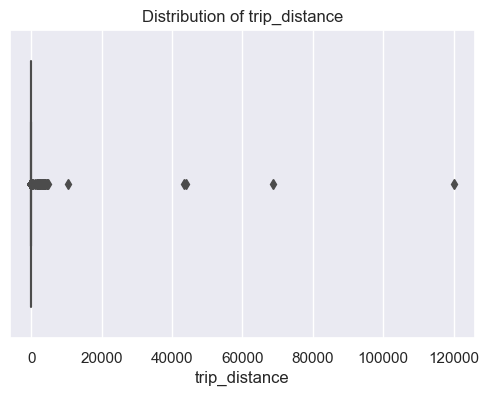

In [239]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='trip_distance')
plt.title('Distribution of trip_distance')
plt.show()

df[(df['trip_distance'] < (Q1 - 1.5 * IQR)) | (df['trip_distance'] > (Q3 + 1.5 * IQR))]['trip_distance'].describe()

**IQR vs Fair Value (maks value of trip_distance)**

In [240]:
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
IQR

2.09

In [241]:
df[(df['trip_distance'] < (Q1 - 1.5 * IQR))]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone


In [242]:
df[(df['trip_distance'] > (Q3 + 1.5 * IQR))]['trip_distance'].describe()

count      5785.000000
mean         73.865485
std        2008.117052
min           6.350000
25%           7.100000
50%           8.240000
75%          10.770000
max      120098.840000
Name: trip_distance, dtype: float64

In [243]:
df[(df['trip_distance'] > (Q3 + 1.5 * IQR))]['trip_distance'].count()

5785

In [244]:
df[(df['trip_distance'] > (Q3 + 1.5 * IQR))]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
12,75,148,2023-01-01 00:26:32,2023-01-01 00:45:31,7.08,Sunday,Sunday,0,0,0 days 00:18:59,1139.0,22.38,30.30,1.0,0.5,3.00,0.00,1,2.75,1,1,1,1,Manhattan,East Harlem South,Brooklyn,Madison
15,195,210,2023-01-01 00:49:34,2023-01-01 01:08:23,11.30,Sunday,Sunday,0,1,0 days 00:18:49,1129.0,36.03,32.50,0.5,1.5,0.00,0.00,1,0.00,2,1,1,1,Brooklyn,Red Hook,Manhattan,SoHo
17,97,68,2023-01-01 00:35:11,2023-01-01 01:17:35,8.28,Sunday,Sunday,0,1,0 days 00:42:24,2544.0,11.72,44.30,1.0,0.5,5.00,0.00,1,2.75,1,1,1,1,Brooklyn,Fort Greene,Bronx,East Concourse/Concourse Village
31,95,265,2023-01-01 00:46:48,2023-01-01 01:08:17,10.44,Sunday,Sunday,0,1,0 days 00:21:29,1289.0,29.16,47.10,1.0,0.5,9.92,0.00,1,0.00,1,1,4,1,Queens,Forest Hills,NaN,NaN
32,66,164,2023-01-01 00:40:58,2023-01-01 01:04:32,6.78,Sunday,Sunday,0,1,0 days 00:23:34,1414.0,17.26,60.00,0.0,0.0,12.61,0.00,0,2.75,1,2,5,4,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Midwood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68187,3,74,2023-01-31 18:35:00,2023-01-31 19:08:00,13.90,Tuesday,Tuesday,18,19,0 days 00:33:00,1980.0,25.27,36.09,0.0,0.0,0.00,0.00,1,NaN,1,1,1,1,Bronx,Allerton/Pelham Gardens,Manhattan,East Harlem South
68195,40,238,2023-01-31 19:52:00,2023-01-31 20:24:00,9.61,Tuesday,Tuesday,19,20,0 days 00:32:00,1920.0,18.02,34.28,0.0,0.0,6.85,0.00,1,NaN,1,1,1,1,Brooklyn,Carroll Gardens,Manhattan,Upper West Side South
68199,179,249,2023-01-31 19:17:00,2023-01-31 20:00:00,10.64,Tuesday,Tuesday,19,20,0 days 00:43:00,2580.0,14.85,27.66,0.0,0.0,5.69,6.55,1,NaN,1,1,1,1,Queens,Old Astoria,Bronx,Westchester Village/Unionport
68201,166,68,2023-01-31 20:57:00,2023-01-31 21:17:00,6.92,Tuesday,Tuesday,20,21,0 days 00:20:00,1200.0,20.76,27.74,0.0,0.0,3.15,0.00,1,NaN,1,1,1,1,Manhattan,Morningside Heights,Bronx,East Concourse/Concourse Village


In [245]:
df[df['trip_distance'] > 70]['trip_distance'].count()

37

**Berdasarkan eksplorasi value kolom 'trip_distance' :**
    
- Apabila outliers dicari dengan menggunakan metode IQR, maka nilai 6.36 sudah termasuk outliers (sedangkan angka tsb masih dalam rentang jarak zona TLC)

- Dengan cara IQR terdapat 5785 data outliers (hal ini sangat significant bila data dihapuskan)

- Dan ketika dilakukan eksplorasi lebih lanjut disimpulkan, angka normal maks dari 'trip_distance' adalah 70

- Sehingga perlu dilakukan penghapusan thd data 'trip_distance' > 70 miles

In [246]:
df.drop(index=df[df['trip_distance'] > 70].index, inplace=True)

# Menghapus 37 data

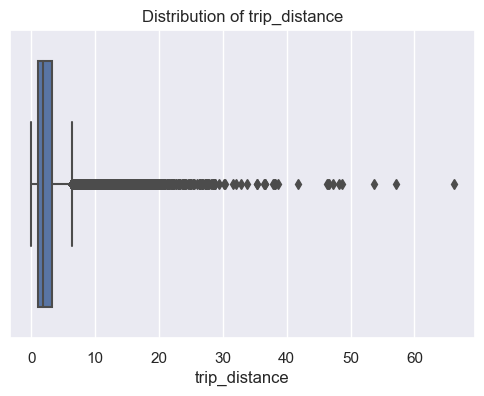

In [247]:
plt.figure(figsize=(6,4))
sns.boxplot(df, x='trip_distance')
plt.title('Distribution of trip_distance')

plt.show()

#### **3.6.4 fare_amount**

**fare_amount (minus)**

In [248]:
df[(df['fare_amount'] < 0)]['fare_amount'].describe()

count    176.000000
mean      -6.823409
std       10.831647
min      -70.000000
25%       -5.800000
50%       -3.000000
75%       -3.000000
max       -2.500000
Name: fare_amount, dtype: float64

In [249]:
df[(df['fare_amount'] < 0)]['dur_seconds'].describe()

count     176.000000
mean      141.284091
std       233.520189
min         2.000000
25%        21.750000
50%        49.000000
75%       160.000000
max      1740.000000
Name: dur_seconds, dtype: float64

**Berdasarkan deskripsi diatas, value dari fare_amount < 0, masih didalam rentang dur_seconds (max = 1740 detik )**

- Value fare_amount dapat (dimutlakkan)

In [250]:
df.loc[(df['fare_amount'] < 0), 'fare_amount'] = abs(df.loc[(df['fare_amount'] < 0), 'fare_amount'])

**fare_amount (unnormal < 3)**

In [251]:
df['fare_amount'].describe()

count    68109.000000
mean        16.637108
std         13.425881
min          0.000000
25%          9.300000
50%         13.500000
75%         19.800000
max        490.000000
Name: fare_amount, dtype: float64

In [252]:
df[df['fare_amount'] < 3]['fare_amount'].count()

155

In [253]:
df.drop(index=df[df['fare_amount'] < 3]['fare_amount'].index, inplace=True)

**fare_amount (outliers) vs trip_distance vs dur_seconds**

In [254]:
df['fare_amount'].describe()

count    67954.000000
mean        16.672738
std         13.420292
min          3.000000
25%          9.300000
50%         13.500000
75%         19.800000
max        490.000000
Name: fare_amount, dtype: float64

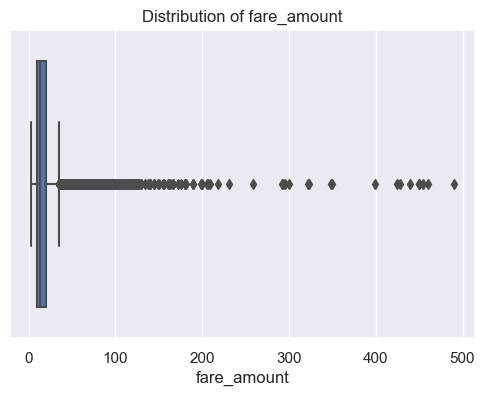

In [255]:
plt.figure(figsize=(6,4))
sns.boxplot(df, x='fare_amount')
plt.title('Distribution of fare_amount')

plt.show()

In [256]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

df[(df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR))]['fare_amount'].describe()

count    4291.000000
mean       51.959863
std        27.988617
min        35.560000
25%        39.400000
50%        45.000000
75%        56.900000
max       490.000000
Name: fare_amount, dtype: float64

In [257]:
df.shape

(67954, 27)

abnormal :

- trip_distance = 0

- dur_seconds < 600

- fare_amount > 15

In [258]:
df[(df['trip_distance'] == 0) & (df['dur_seconds'] < 600) & (df['fare_amount'] > 15)]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
99,168,168,2023-01-01 01:27:36,2023-01-01 01:27:43,0.0,Sunday,Sunday,1,1,0 days 00:00:07,7.0,0.0,20.00,0.0,0.0,0.00,0.0,1,0.0,1,2,5,1,Bronx,Mott Haven/Port Morris,Bronx,Mount Hope
166,51,264,2023-01-01 02:37:12,2023-01-01 02:37:15,0.0,Sunday,Sunday,2,2,0 days 00:00:03,3.0,0.0,40.00,0.0,0.0,0.00,0.0,1,0.0,1,2,5,3,Bronx,Co-Op City,NaN,Outside of NYC
173,260,264,2023-01-01 02:37:12,2023-01-01 02:37:15,0.0,Sunday,Sunday,2,2,0 days 00:00:03,3.0,0.0,20.00,0.0,0.0,4.20,0.0,1,0.0,1,2,5,1,Queens,Woodside,NaN,Outside of NYC
185,223,223,2023-01-01 02:09:48,2023-01-01 02:11:34,0.0,Sunday,Sunday,2,2,0 days 00:01:46,106.0,0.0,110.00,0.0,0.0,0.00,0.0,1,0.0,2,2,5,1,Queens,Steinway,Manhattan,Stuy Town/Peter Cooper Village
193,70,70,2023-01-01 02:38:02,2023-01-01 02:38:04,0.0,Sunday,Sunday,2,2,0 days 00:00:02,2.0,0.0,25.00,0.0,0.0,0.00,0.0,1,0.0,1,2,5,1,Queens,East Elmhurst,Brooklyn,East Flatbush/Farragut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64303,83,138,2023-01-04 04:45:00,2023-01-04 04:51:00,0.0,Wednesday,Wednesday,4,4,0 days 00:06:00,360.0,0.0,45.54,0.0,0.0,9.31,0.0,1,NaN,1,1,1,1,Queens,Elmhurst/Maspeth,Queens,Laurelton
65077,75,75,2023-01-10 08:09:00,2023-01-10 08:10:00,0.0,Tuesday,Tuesday,8,8,0 days 00:01:00,60.0,0.0,20.34,0.0,0.0,0.37,0.0,1,NaN,1,1,1,1,Manhattan,East Harlem South,Brooklyn,East New York
65254,166,166,2023-01-11 11:25:38,2023-01-11 11:25:40,0.0,Wednesday,Wednesday,11,11,0 days 00:00:02,2.0,0.0,27.31,0.0,0.5,0.00,0.0,1,NaN,1,1,1,1,Manhattan,Morningside Heights,Bronx,Morrisania/Melrose
66601,129,129,2023-01-20 11:38:00,2023-01-20 11:40:00,0.0,Friday,Friday,11,11,0 days 00:02:00,120.0,0.0,41.60,0.0,0.0,0.00,0.0,1,NaN,1,1,1,1,Queens,Jackson Heights,Queens,Jamaica


In [259]:
df.drop(index=df[(df['trip_distance'] == 0) & (df['dur_seconds'] < 600) & (df['fare_amount'] > 15)].index, inplace=True)

abnormal :

- trip_distance < 0

- dur_seconds < 1800

- fare_amount > 30

In [260]:
df[(df['trip_distance'] < 5) & (df['dur_seconds'] < 1800) & (df['fare_amount'] > 30)]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone
104,179,179,2023-01-01 01:11:01,2023-01-01 01:11:06,0.01,Sunday,Sunday,1,1,0 days 00:00:05,5.0,7.20,190.00,0.0,0.0,0.00,0.00,1,0.00,2,2,5,2,Queens,Old Astoria,Queens,Ozone Park
163,36,36,2023-01-01 01:59:48,2023-01-01 01:59:51,0.09,Sunday,Sunday,1,1,0 days 00:00:03,3.0,108.00,100.00,0.0,0.0,20.06,0.00,0,0.00,1,2,5,2,Brooklyn,Bushwick North,Brooklyn,Bushwick South
168,112,114,2023-01-01 02:28:59,2023-01-01 02:54:50,4.87,Sunday,Sunday,2,2,0 days 00:25:51,1551.0,11.30,40.00,0.0,0.0,8.75,0.00,1,2.75,1,2,5,1,Brooklyn,Greenpoint,Staten Island,Grymes Hill/Clifton
182,255,90,2023-01-01 02:53:40,2023-01-01 03:13:09,4.84,Sunday,Sunday,2,3,0 days 00:19:29,1169.0,14.91,80.00,0.0,0.0,1.00,6.55,1,2.75,1,2,5,1,Brooklyn,Williamsburg (North Side),Brooklyn,Flatlands
198,101,101,2023-01-01 03:06:11,2023-01-01 03:06:41,1.30,Sunday,Sunday,3,3,0 days 00:00:30,30.0,156.00,90.00,0.0,0.0,0.00,0.00,0,0.00,3,2,5,1,Queens,Glen Oaks,Queens,Glendale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67023,129,80,2023-01-23 12:05:00,2023-01-23 12:33:00,0.00,Monday,Monday,12,12,0 days 00:28:00,1680.0,0.00,30.09,0.0,0.0,0.56,0.00,1,NaN,1,1,1,1,Queens,Jackson Heights,Bronx,Eastchester
67186,7,161,2023-01-24 12:20:00,2023-01-24 12:49:00,4.97,Tuesday,Tuesday,12,12,0 days 00:29:00,1740.0,10.28,37.12,0.0,0.0,8.17,0.00,1,NaN,1,1,1,1,Queens,Astoria,Manhattan,Midtown East
67297,196,74,2023-01-25 10:51:00,2023-01-25 11:15:00,0.00,Wednesday,Wednesday,10,11,0 days 00:24:00,1440.0,0.00,43.09,0.0,0.0,10.13,6.55,1,NaN,1,1,1,1,Queens,Rego Park,Manhattan,East Harlem South
67564,33,138,2023-01-27 07:09:00,2023-01-27 07:27:00,1.65,Friday,Friday,7,7,0 days 00:18:00,1080.0,5.50,35.27,0.0,0.0,7.25,0.00,1,NaN,1,1,1,1,Brooklyn,Brooklyn Heights,Queens,Laurelton


In [261]:
df.drop(index=df[(df['trip_distance'] < 5) & (df['dur_seconds'] < 1800) & (df['fare_amount'] > 30)].index, inplace=True)

In [262]:
df['fare_amount'].describe()

count    67265.000000
mean        16.387743
std         11.959152
min          3.000000
25%          9.300000
50%         13.000000
75%         19.800000
max        348.100000
Name: fare_amount, dtype: float64

In [263]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
IQR

10.5

In [264]:
df[(df['fare_amount'] > (Q3 + 1.5 * IQR))]['fare_amount'].describe()

count    4007.000000
mean       50.424170
std        19.788952
min        35.560000
25%        39.400000
50%        44.500000
75%        55.500000
max       348.100000
Name: fare_amount, dtype: float64

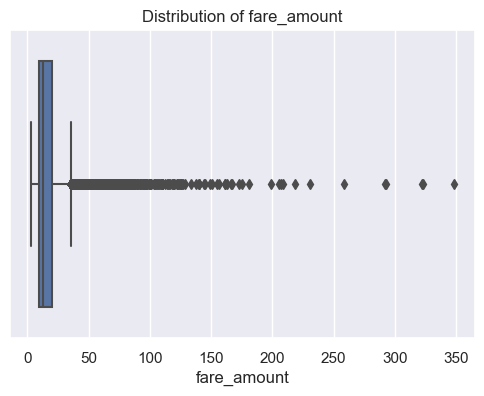

In [265]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='fare_amount')
plt.title('Distribution of fare_amount')
plt.show()

outliers :

- fare_amount > 250

In [266]:
df[df['fare_amount'] > 250]['fare_amount'].count()

6

In [267]:
df.drop(index=df[df['fare_amount'] > 250]['fare_amount'].index, inplace=True)

In [268]:
df['fare_amount'].describe()

count    67259.000000
mean        16.361898
std         11.639258
min          3.000000
25%          9.300000
50%         13.000000
75%         19.800000
max        230.500000
Name: fare_amount, dtype: float64

#### **3.6.5 dur_seconds**

In [269]:
df['dur_seconds'].describe()

count    67259.000000
mean      1086.818210
std       4462.035394
min          1.000000
25%        439.000000
50%        688.000000
75%       1050.000000
max      86336.000000
Name: dur_seconds, dtype: float64

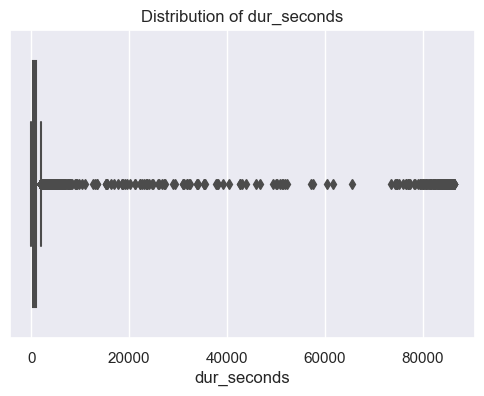

In [270]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='dur_seconds')
plt.title('Distribution of dur_seconds')
plt.show()

In [271]:
Q1 = df['dur_seconds'].quantile(0.25)
Q3 = df['dur_seconds'].quantile(0.75)
IQR = Q3 - Q1
IQR

611.0

In [272]:
df[(df['dur_seconds'] < (Q1 - 1.5 * IQR)) | (df['dur_seconds'] > (Q3 + 1.5 * IQR))]['dur_seconds'].describe()

count     3556.000000
mean      7413.586614
std      18203.091941
min       1967.000000
25%       2157.000000
50%       2482.000000
75%       3143.500000
max      86336.000000
Name: dur_seconds, dtype: float64

In [273]:
df[df['dur_seconds'] > 40000]['dur_seconds'].count()

201

Abnormal :

- duration > 2.5 hour

In [274]:
df.drop(index=df[df['dur_seconds'] > 10000]['dur_seconds'].index, inplace=True)

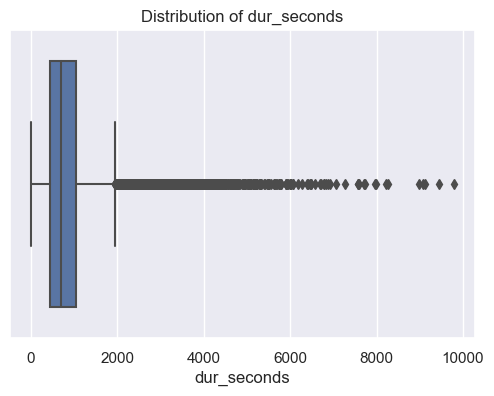

In [275]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='dur_seconds')
plt.title('Distribution of dur_seconds')
plt.show()

#### **3.6.6 speed_mph**

In [276]:
df['speed_mph'].describe()

count    67002.000000
mean        13.289670
std         92.206789
min          0.000000
25%          8.270000
50%         10.460000
75%         13.540000
max      11700.000000
Name: speed_mph, dtype: float64

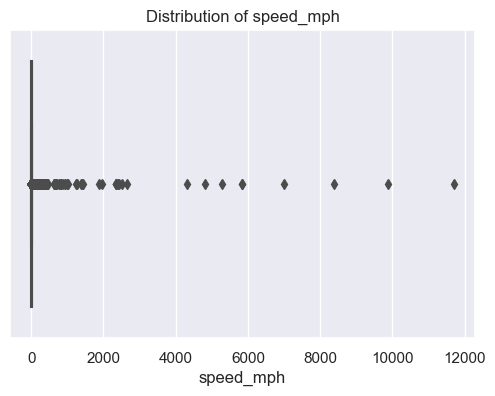

In [277]:
plt.figure(figsize=(6,4))

sns.boxplot(df, x='speed_mph')
plt.title('Distribution of speed_mph')
plt.show()

In [278]:
df[df['speed_mph'] > 25]['speed_mph'].count()

2283

Abnormal :

- speed_mph > 25

In [279]:
df.drop(index=df[df['speed_mph'] > 25]['speed_mph'].index, inplace=True)

#### **3.6.7 passenger_count**

In [280]:
df['passenger_count'].value_counts()

passenger_count
1    55905
2     4842
5     1690
6     1029
3      907
4      342
7        2
8        1
9        1
Name: count, dtype: int64

Abnormal :

- passenger_count > 5

In [281]:
df.drop(index=df[df['passenger_count'] > 5]['passenger_count'].index, inplace=True)

#### **3.6.8 extra**

In [282]:
df['extra'].value_counts().sort_index()

extra
-2.50       47
-1.00       31
 0.00    37764
 0.50      564
 1.00    10448
 2.50    11779
 2.75     1545
 3.25       48
 3.75      199
 5.00      480
 5.25      490
 6.00       31
 7.50      260
Name: count, dtype: int64

In [283]:
df.drop(index=df[df['extra'] < 0]['extra'].index, inplace=True)

#### **3.6.9 mta_tax**

In [284]:
df['mta_tax'].value_counts().sort_index()

mta_tax
-0.5       77
 0.0     4696
 0.5    50258
 1.0       18
 1.5     8559
Name: count, dtype: int64

In [285]:
df.drop(index=df[df['mta_tax'] < 0]['mta_tax'].index, inplace=True)

#### **3.6.9 tip_amount**

In [286]:
df['tip_amount'].value_counts().sort_index()

tip_amount
0.00      26519
0.01        153
0.02         41
0.03         15
0.04          9
          ...  
77.88         1
80.00         2
80.88         1
100.00        1
222.22        1
Name: count, Length: 1375, dtype: int64

In [287]:
df['tip_amount'].describe()

count    63531.000000
mean         2.074750
std          2.875358
min          0.000000
25%          0.000000
50%          1.620000
75%          3.270000
max        222.220000
Name: tip_amount, dtype: float64

In [288]:
Q1 = df['tip_amount'].quantile(0.25)
Q3 = df['tip_amount'].quantile(0.75)
IQR = Q3 - Q1
IQR

df[(df['tip_amount'] < (Q1 - 1.5 * IQR)) | (df['tip_amount'] > (Q3 + 1.5 * IQR))]['tip_amount'].count()

1593

In [289]:
df.drop(index=df[(df['tip_amount'] < (Q1 - 1.5 * IQR)) | (df['tip_amount'] > (Q3 + 1.5 * IQR))]['tip_amount'].index, inplace=True)

#### **3.6.10 tolls_amount**

In [290]:
df['improve_sur'].describe()

count    61938.000000
mean         0.940214
std          0.237295
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: improve_sur, dtype: float64

In [291]:
df['improve_sur'].value_counts().sort_index()

improve_sur
-1        3
 0     3697
 1    58238
Name: count, dtype: int64

In [292]:
df.drop(index=df[df['improve_sur'] < 0]['improve_sur'].index, inplace=True)

In [293]:
df.shape

(61935, 27)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61935 entries, 0 to 68210
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pu_loc           61935 non-null  int64         
 1   do_loc           61935 non-null  int64         
 2   pu_datetime      61935 non-null  datetime64[s] 
 3   do_datetime      61935 non-null  datetime64[s] 
 4   trip_distance    61935 non-null  float64       
 5   pu_day           61935 non-null  object        
 6   do_day           61935 non-null  object        
 7   pu_hour          61935 non-null  int32         
 8   do_hour          61935 non-null  int32         
 9   duration         61935 non-null  timedelta64[s]
 10  dur_seconds      61935 non-null  float64       
 11  speed_mph        61935 non-null  float64       
 12  fare_amount      61935 non-null  float64       
 13  extra            61935 non-null  float64       
 14  mta_tax          61935 non-null  float64   

#### **3.6.11 total_amount**

In [295]:
df['total_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improve_sur'] + df['congest_sur']

df.head()

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone,total_amount
0,166,143,2023-01-01 00:26:10,2023-01-01 00:37:11,2.58,Sunday,Sunday,0,0,0 days 00:11:01,661.0,14.05,14.9,1.0,0.5,4.03,0.0,1,2.75,1,1,1,1,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa,24.18
1,24,43,2023-01-01 00:51:03,2023-01-01 00:57:49,1.81,Sunday,Sunday,0,0,0 days 00:06:46,406.0,16.05,10.7,1.0,0.5,2.64,0.0,1,0.00,1,1,1,1,Manhattan,Bloomingdale,Staten Island,Charleston/Tottenville,15.84
2,223,179,2023-01-01 00:35:12,2023-01-01 00:41:32,0.00,Sunday,Sunday,0,0,0 days 00:06:20,380.0,0.00,7.2,1.0,0.5,1.94,0.0,1,0.00,1,1,1,1,Queens,Steinway,Queens,Ozone Park,11.64
3,41,238,2023-01-01 00:13:14,2023-01-01 00:19:03,1.30,Sunday,Sunday,0,0,0 days 00:05:49,349.0,13.41,6.5,0.5,1.5,1.70,0.0,1,0.00,1,1,1,1,Manhattan,Central Harlem,Manhattan,Upper West Side South,11.20
4,41,74,2023-01-01 00:33:04,2023-01-01 00:39:02,1.10,Sunday,Sunday,0,0,0 days 00:05:58,358.0,11.06,6.0,0.5,1.5,0.00,0.0,1,0.00,1,1,1,1,Manhattan,Central Harlem,Manhattan,East Harlem South,9.00


In [296]:
df.head(1)

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,payment_type,trip_type,ratecode,passenger_count,pu_borough,pu_zone,do_borough,do_zone,total_amount
0,166,143,2023-01-01 00:26:10,2023-01-01 00:37:11,2.58,Sunday,Sunday,0,0,0 days 00:11:01,661.0,14.05,14.9,1.0,0.5,4.03,0.0,1,2.75,1,1,1,1,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa,24.18


In [297]:
df = df[['pu_loc','do_loc', 'pu_datetime', 'do_datetime', 'trip_distance',
         'pu_day', 'do_day', 'pu_hour', 'do_hour', 'duration', 'dur_seconds', 'speed_mph', 
         'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improve_sur', 'congest_sur','total_amount',
         'payment_type', 'trip_type', 'passenger_count','ratecode','pu_borough', 'pu_zone', 'do_borough', 'do_zone']]
df.head()

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,total_amount,payment_type,trip_type,passenger_count,ratecode,pu_borough,pu_zone,do_borough,do_zone
0,166,143,2023-01-01 00:26:10,2023-01-01 00:37:11,2.58,Sunday,Sunday,0,0,0 days 00:11:01,661.0,14.05,14.9,1.0,0.5,4.03,0.0,1,2.75,24.18,1,1,1,1,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa
1,24,43,2023-01-01 00:51:03,2023-01-01 00:57:49,1.81,Sunday,Sunday,0,0,0 days 00:06:46,406.0,16.05,10.7,1.0,0.5,2.64,0.0,1,0.00,15.84,1,1,1,1,Manhattan,Bloomingdale,Staten Island,Charleston/Tottenville
2,223,179,2023-01-01 00:35:12,2023-01-01 00:41:32,0.00,Sunday,Sunday,0,0,0 days 00:06:20,380.0,0.00,7.2,1.0,0.5,1.94,0.0,1,0.00,11.64,1,1,1,1,Queens,Steinway,Queens,Ozone Park
3,41,238,2023-01-01 00:13:14,2023-01-01 00:19:03,1.30,Sunday,Sunday,0,0,0 days 00:05:49,349.0,13.41,6.5,0.5,1.5,1.70,0.0,1,0.00,11.20,1,1,1,1,Manhattan,Central Harlem,Manhattan,Upper West Side South
4,41,74,2023-01-01 00:33:04,2023-01-01 00:39:02,1.10,Sunday,Sunday,0,0,0 days 00:05:58,358.0,11.06,6.0,0.5,1.5,0.00,0.0,1,0.00,9.00,1,1,1,1,Manhattan,Central Harlem,Manhattan,East Harlem South


## <hr>

#### **3.6.12 pu_zone**

In [298]:
df[df['pu_zone'].isna()]

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,total_amount,payment_type,trip_type,passenger_count,ratecode,pu_borough,pu_zone,do_borough,do_zone
245,264,264,2023-01-01 03:16:39,2023-01-01 03:16:42,0.0,Sunday,Sunday,3,3,0 days 00:00:03,3.0,0.00,10.0,0.0,0.0,0.0,0.0,1,0.0,11.0,2,2,1,5,Unknown,NaN,NaN,Outside of NYC
283,264,264,2023-01-01 05:29:35,2023-01-01 05:29:37,0.0,Sunday,Sunday,5,5,0 days 00:00:02,2.0,0.00,12.0,0.0,0.0,2.6,0.0,1,0.0,15.6,1,2,1,5,Unknown,NaN,NaN,Outside of NYC
1331,264,264,2023-01-02 04:41:06,2023-01-02 04:41:08,0.0,Monday,Monday,4,4,0 days 00:00:02,2.0,0.00,3.0,1.0,0.5,0.0,0.0,1,0.0,5.5,2,1,1,1,Unknown,NaN,NaN,Outside of NYC
1345,264,256,2023-01-02 06:40:44,2023-01-02 06:50:28,2.4,Monday,Monday,6,6,0 days 00:09:44,584.0,14.79,10.0,0.0,1.5,0.0,0.0,1,0.0,12.5,2,1,2,1,Unknown,NaN,Brooklyn,Windsor Terrace
3726,264,264,2023-01-03 14:35:04,2023-01-03 14:45:18,3.7,Tuesday,Tuesday,14,14,0 days 00:10:14,614.0,21.69,16.3,0.0,1.5,0.0,0.0,1,0.0,18.8,2,1,1,1,Unknown,NaN,NaN,Outside of NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59716,264,264,2023-01-30 06:55:48,2023-01-30 07:21:48,5.9,Monday,Monday,6,7,0 days 00:26:00,1560.0,13.62,29.6,0.0,0.5,0.0,0.0,1,0.0,31.1,2,1,1,1,Unknown,NaN,NaN,Outside of NYC
60022,264,264,2023-01-30 09:53:59,2023-01-30 09:54:01,0.0,Monday,Monday,9,9,0 days 00:00:02,2.0,0.00,3.0,0.0,0.5,0.0,0.0,1,0.0,4.5,3,1,1,1,Unknown,NaN,NaN,Outside of NYC
60553,264,264,2023-01-30 14:41:14,2023-01-30 15:25:55,0.0,Monday,Monday,14,15,0 days 00:44:41,2681.0,0.00,37.5,0.0,1.5,0.0,0.0,1,0.0,40.0,1,1,1,1,Unknown,NaN,NaN,Outside of NYC
61912,264,264,2023-01-31 08:16:40,2023-01-31 08:45:26,0.0,Tuesday,Tuesday,8,8,0 days 00:28:46,1726.0,0.00,19.5,0.0,1.5,0.0,0.0,1,0.0,22.0,1,1,1,1,Unknown,NaN,NaN,Outside of NYC


In [299]:
df.drop(index=df[df['pu_zone'].isna()]['pu_zone'].index, inplace=True)

## **4. Data Analysis**

### **4.1 Data Correlation**

In [300]:
# Using df.corr of Spearman method to find the correlation of data
df.corr(method='spearman',numeric_only=True)

,pu_loc,do_loc,trip_distance,pu_hour,do_hour,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,total_amount,payment_type,trip_type,passenger_count,ratecode
pu_loc,1.000000,0.058809,0.060424,0.042001,0.040502,0.044847,0.047559,0.072824,0.055417,-0.039017,-0.048761,0.021885,0.018771,-0.135964,0.043455,0.062290,0.034886,0.045130,0.038064
do_loc,0.058809,1.000000,0.206201,0.020351,0.022304,0.170163,0.089047,0.188437,0.067295,-0.008091,0.172602,0.001298,-0.007844,0.432635,0.284643,-0.099883,0.017744,0.003939,0.020751
trip_distance,0.060424,0.206201,1.000000,-0.017760,-0.006474,0.774091,0.494679,0.840565,0.045350,-0.121441,0.275468,0.095841,-0.001311,0.342245,0.809107,-0.065888,-0.048463,0.021434,-0.034459
pu_hour,0.042001,0.020351,-0.017760,1.000000,0.974240,-0.049888,0.026722,-0.051024,0.468977,-0.009244,0.052551,-0.027816,-0.015236,-0.014824,0.044259,-0.024709,-0.012895,-0.003702,-0.011200
do_hour,0.040502,0.022304,-0.006474,0.974240,1.000000,-0.030407,0.019690,-0.033519,0.459312,-0.007077,0.056156,-0.020903,-0.015967,-0.010111,0.060440,-0.026682,-0.014539,-0.007801,-0.012772
dur_seconds,0.044847,0.170163,0.774091,-0.049888,-0.030407,1.000000,-0.029967,0.935554,-0.034715,-0.011098,0.198706,0.145758,-0.002609,0.286310,0.877128,-0.069676,-0.060714,0.008435,-0.048364
speed_mph,0.047559,0.089047,0.494679,0.026722,0.019690,-0.029967,1.000000,0.170478,0.088638,-0.091859,0.132503,0.073561,0.014537,0.143395,0.186347,-0.058319,-0.027283,0.003448,-0.018143
fare_amount,0.072824,0.188437,0.840565,-0.051024,-0.033519,0.935554,0.170478,1.000000,-0.039536,-0.112333,0.229438,0.163833,0.046563,0.297340,0.932761,-0.102971,0.027411,0.006497,0.037980
extra,0.055417,0.067295,0.045350,0.468977,0.459312,-0.034715,0.088638,-0.039536,1.000000,0.214802,0.088854,-0.024930,0.028469,0.098351,0.185759,-0.021002,-0.084823,0.054420,-0.088487
mta_tax,-0.039017,-0.008091,-0.121441,-0.009244,-0.007077,-0.011098,-0.091859,-0.112333,0.214802,1.000000,-0.105947,-0.001353,0.073891,0.009975,0.071216,0.086145,-0.247277,0.036027,-0.245784


**Correlation Matrix**

In [301]:
# Create numeric columns
numeric_columns = df.select_dtypes(include=['int32','float64']).columns

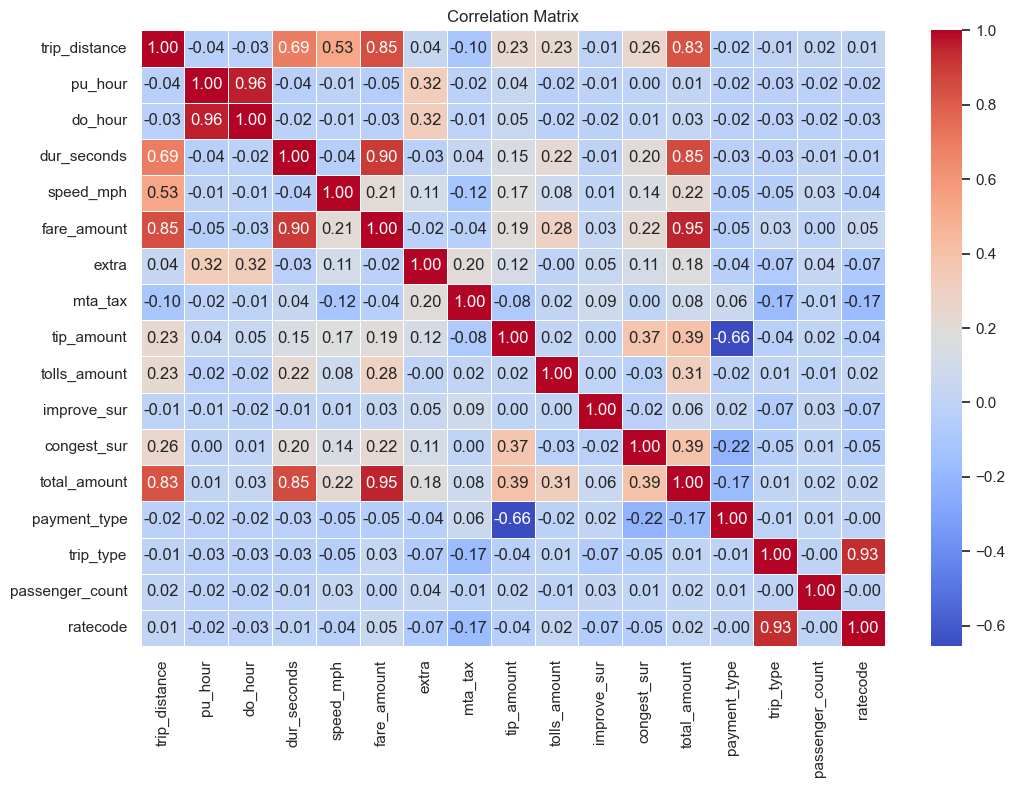

In [302]:
# correlation matrix 
correlation_matrix = df[numeric_columns].corr()

# figure
plt.figure(figsize=(12, 8))

# the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# title of this heatmap
plt.title('Correlation Matrix')

# display the heatmap
plt.show()

**Insight :**

1. trip_distance berkorelasi positif kuat dengan fare_amount, dur_seconds, total_amount, speed_mph (sesuai), trip_distance berkorelasi negatif thd mta_tax (area Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties)

### **5.2 Trip Count Analysis**

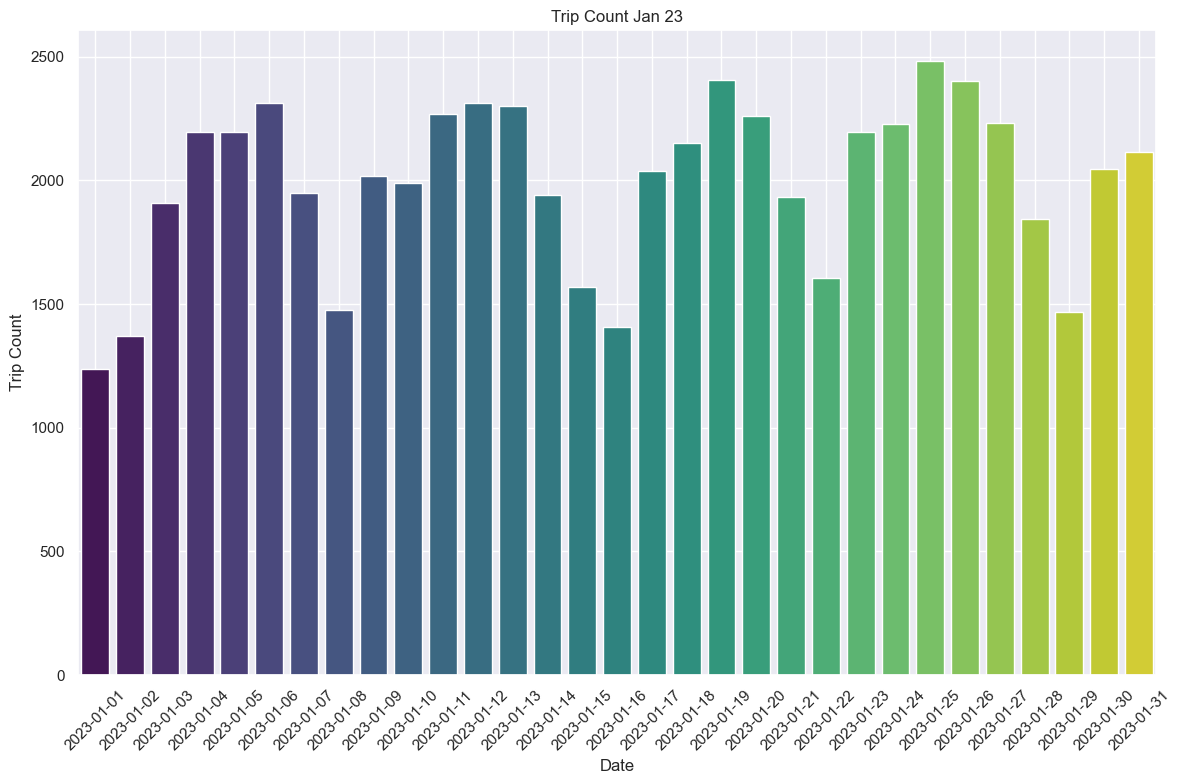

In [303]:
# 'date_only' column
df['date_only'] = df['pu_datetime'].dt.date

# Group by cohorts and calculate trip counts
cohort_passenger_counts = df.groupby('date_only')['trip_type'].count().reset_index()

# Plotting distribution of trip counts over cohorts using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='date_only', y='trip_type', data=cohort_passenger_counts, palette='viridis')
plt.title('Trip Count Jan 23')
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()

Berdasarkan tampilan jumlah perjalanan tersebut diatas, terlihat distribusi jumlah perjalanan dimasing-masing hari di bulan Januari, dimana hari minggu merupakan hari dengan jumlah trip terendah.

Hal ini dikarenakan minggu merupakan hari libur kerja, sehingga aktivitas dikota Newyork relatif lebih rendah jika dibandingkan dengan hari kerja

Terdapat beberapa peluang yang muncul dari temuan data tsb :

1. Perusahaan dapat menentukan besaran / kisaran jumlah taxi yang dioperasionalkan (terutama pada hari kerja), untuk mengantisipasi kebutuhan customer

2. Perusahaan dapat memberikan program (stimulus) untuk 



### **5.3 Trip Distance Analysis**

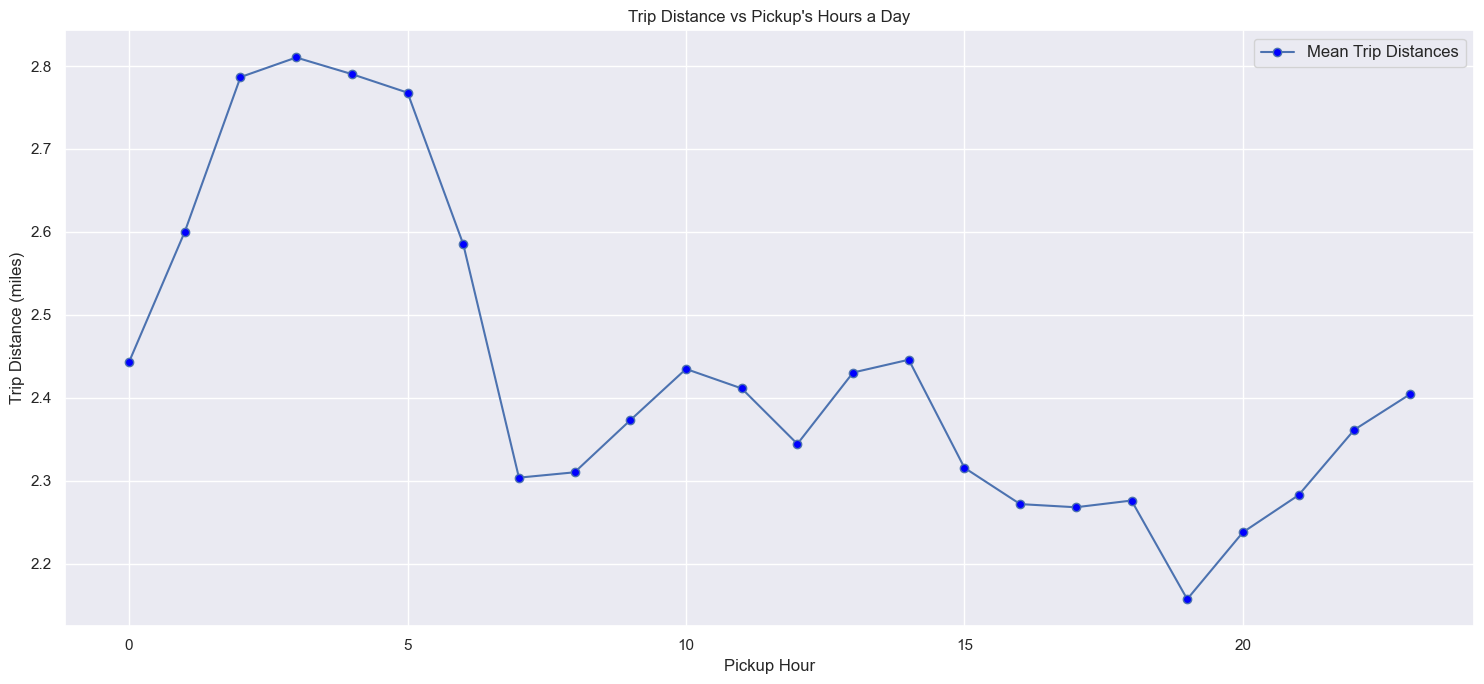

In [304]:
# Calculate mean trip distance for each pickup hour
pu = df.groupby(by='pu_hour', as_index=False)['trip_distance'].mean()

# Plotting Trip Distance vs Pickup's Hours a Day
plt.figure(figsize=(15, 7))
plt.plot(pu['pu_hour'], pu['trip_distance'], marker='o', markerfacecolor='blue', label='Mean Trip Distances')
plt.title("Trip Distance vs Pickup's Hours a Day")
plt.xlabel("Pickup Hour")
plt.ylabel('Trip Distance (miles)')
plt.legend(loc='best', fontsize=12)
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()

Dari gambar di atas, kita dapat melihat bahwa trip distance yang dikelompokkan berdasarkan jam :

- Rata- rata perjalanan terjauh terjadi dijam 3 sampai 6

- trip distance terlihat pendek dijam 16 sampai jam 22 malam 

In [305]:
df['pu_borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', nan, 'Staten Island'],
      dtype=object)

### **5.4 Trip Count vs pu_location Analysis**

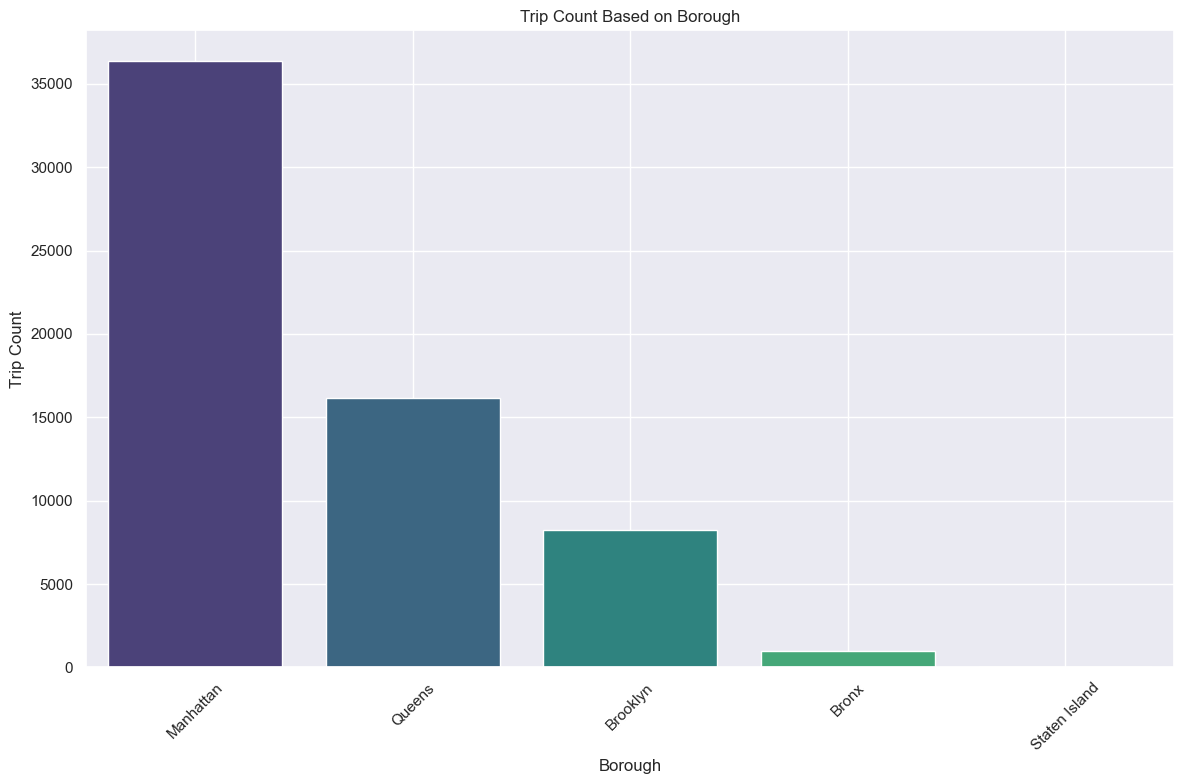

In [306]:
# Group by cohorts and calculate average passenger count
cohort_passenger_counts = df.groupby('pu_borough')['trip_type'].count().reset_index()
sorted_counts = cohort_passenger_counts.sort_values(by='trip_type', ascending=False)

# Plotting Distribution of Passenger Counts Over Cohorts using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='pu_borough', y='trip_type', data=sorted_counts, palette='viridis')
plt.title('Trip Count Based on Borough')
plt.xlabel('Borough')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()

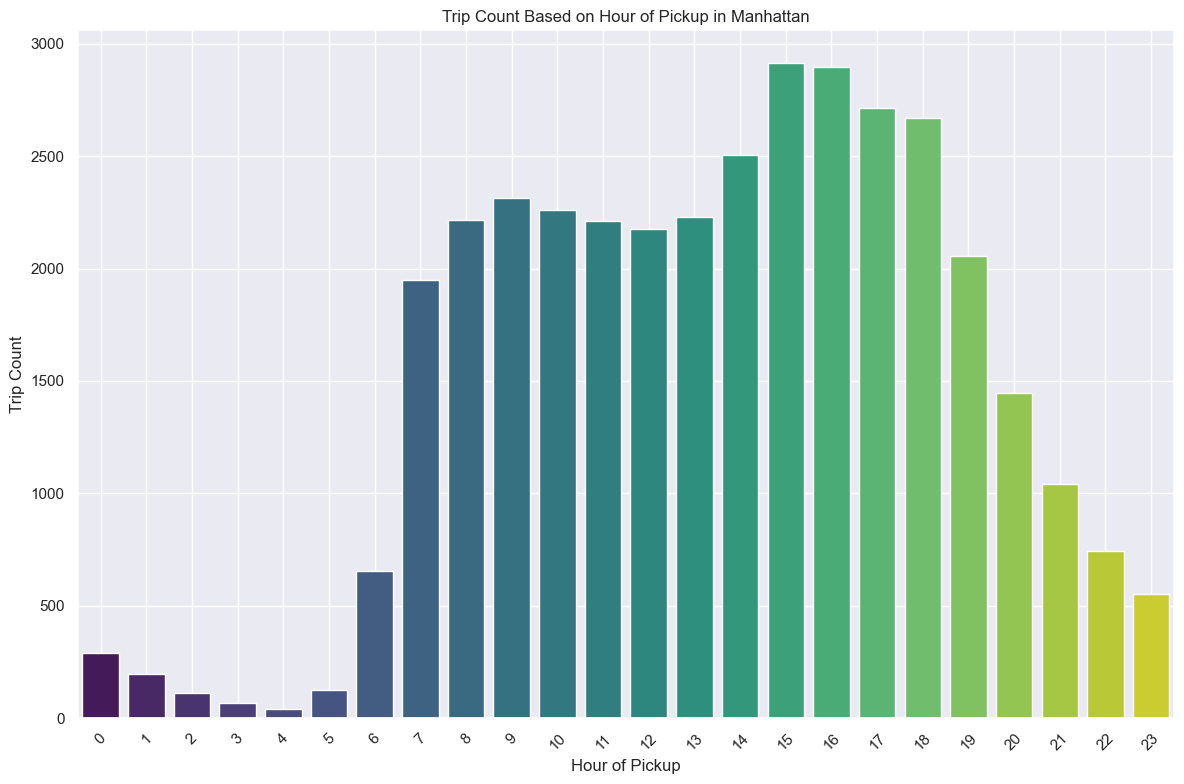

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already calculated cohort_passenger_counts_a as you mentioned

# Plotting Distribution of Passenger Counts Over Cohorts using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=cohort_passenger_counts_a.index, y=cohort_passenger_counts_a.values, palette='viridis')
plt.title('Trip Count Based on Hour of Pickup in Manhattan')
plt.xlabel('Hour of Pickup')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.grid(True)

# Show visualization
plt.tight_layout()
plt.show()


In [308]:
df.head(1)

,pu_loc,do_loc,pu_datetime,do_datetime,trip_distance,pu_day,do_day,pu_hour,do_hour,duration,dur_seconds,speed_mph,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improve_sur,congest_sur,total_amount,payment_type,trip_type,passenger_count,ratecode,pu_borough,pu_zone,do_borough,do_zone,date_only
0,166,143,2023-01-01 00:26:10,2023-01-01 00:37:11,2.58,Sunday,Sunday,0,0,0 days 00:11:01,661.0,14.05,14.9,1.0,0.5,4.03,0.0,1,2.75,24.18,1,1,1,1,Manhattan,Morningside Heights,Manhattan,Little Italy/NoLiTa,2023-01-01


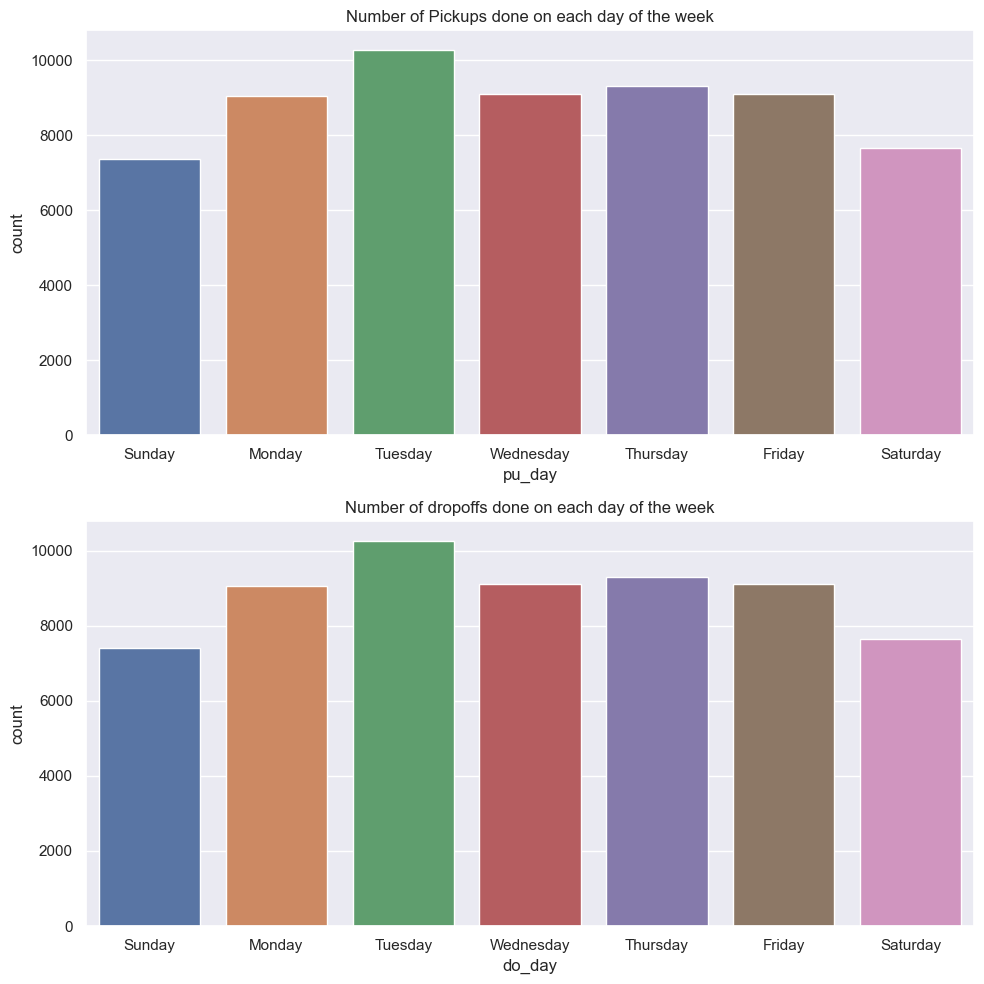

In [309]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pu_day',data=df,ax=ax[0])

ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='do_day',data=df,ax=ax[1])

ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

Analisis Jumlah Penumpang bertujuan untuk memahami bagaimana distribusi jumlah penumpang berubah pada kelompok yang berbeda, di mana kelompok ditentukan berdasarkan bulan pengambilan. Analisis ini membantu mengidentifikasi pola atau tren terkait jumlah penumpang perjalanan taksi dari waktu ke waktu

## **6. Export Clean Datatype into CSV**

In [310]:
Export Data that is already cleaned to be analysed in further visualization
df.to_csv('NYC_TLC_Trip_Record_Cleaned.csv', index=False)